In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Statistical Models
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2 
from statsmodels.tsa.arima_model import ARMA
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.graphics.tsaplots as sgt

# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
import sklearn.gaussian_process as gp


import math
import itertools
import pandas as pd
import numpy as np
from scipy.stats import boxcox, kurtosis, skew
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

%matplotlib inline

In [113]:
# Load the data (assuming you have a CSV file with 'date' and 'price' columns)
data = pd.read_csv(r'C:\Users\arjd2\OneDrive\Documents\GitHub\JPMC_Quant_Research\task1\data\Nat_Gas.csv')
data.head()

,Dates,Prices
0,31-10-2020,10.1
1,30-11-2020,10.3
2,31-12-2020,11.0
3,31-01-2021,10.9
4,28-02-2021,10.9


In [114]:
data['Dates'] = pd.to_datetime(data['Dates'])
data.set_index('Dates', inplace=True)

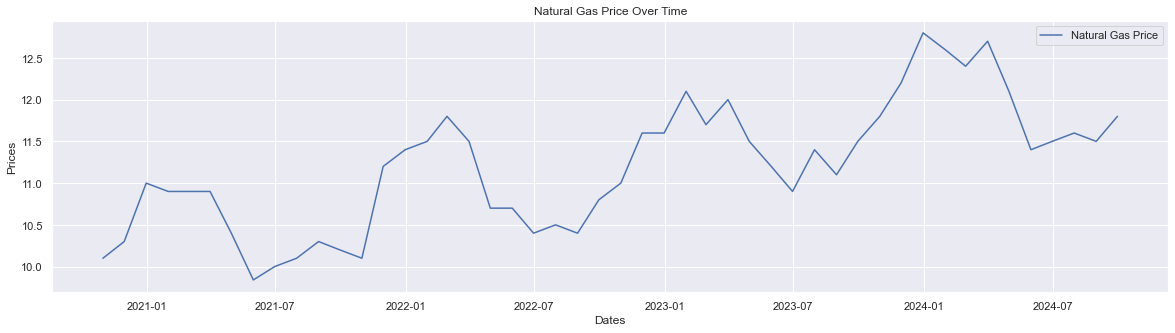

In [115]:
# Visualize the data
plt.figure(figsize=(20, 5))
plt.plot(data['Prices'], label='Natural Gas Price')
plt.title('Natural Gas Price Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

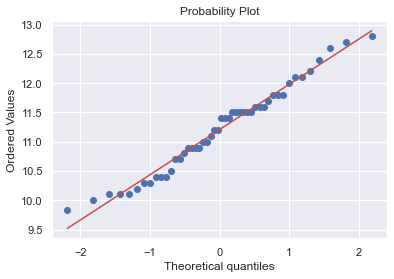

In [116]:
import scipy.stats as sci
import pylab

sci.probplot(data.Prices, plot = pylab)
pylab.show()

In [117]:
# Custom Return fucntion
def returns(df,lags):
    df['returns'] = df.Prices.pct_change(lags).mul(100)
    df_new = df.iloc[lags:]
    df_ret = df.returns.iloc[lags:]
    return df_ret, df_new

# Custom ADF test
def adfuller_test(sales):
    result= sts.adfuller(sales)
    labels=['ADF test: ','p-value: ','Lags Used: ']
    for value,label in zip(result,labels):
        print(label +":"+str(value))
    
    if result[1]<=.05:
        print("reject null hypothesis (h0)\nUnit root does not exist\nSeries is stationary")
    else:
        print("fail to reject null hypothesis(h0)\nUnit root exists\nSeries is not sationary")

# Custom normalization function
def norm(df):
    benchmark = df.Prices.iloc[0]
    df_norm = df.Prices.div(benchmark).mul(100)
    df['norm'] = df.Prices.div(benchmark).mul(100)

# Function to take the log of a specified column
def log_transform_column(dataframe, column_name):
    # Check if the column exists in the DataFrame
    if column_name in dataframe.columns:
        # Apply the log transformation to the specified column
        dataframe[column_name] = np.log(dataframe[column_name])
        return dataframe
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return None


In [118]:
adfuller_test(data.Prices)

ADF test: :0.21807686170000193
p-value: :0.9732574388448694
Lags Used: :10
fail to reject null hypothesis(h0)
Unit root exists
Series is not sationary


In [119]:
df_ret, data_ret = returns(data,1)
data_ret

,Prices,returns
Dates,,
2020-11-30,10.3,1.980198
2020-12-31,11.0,6.796117
2021-01-31,10.9,-0.909091
2021-02-28,10.9,0.000000
2021-03-31,10.9,0.000000
...,...,...
2024-05-31,11.4,-5.785124
2024-06-30,11.5,0.877193
2024-07-31,11.6,0.869565


In [120]:
adfuller_test(data_ret.returns)

ADF test: :-6.824443471200051
p-value: :1.9641481940145984e-09
Lags Used: :9
reject null hypothesis (h0)
Unit root does not exist
Series is stationary


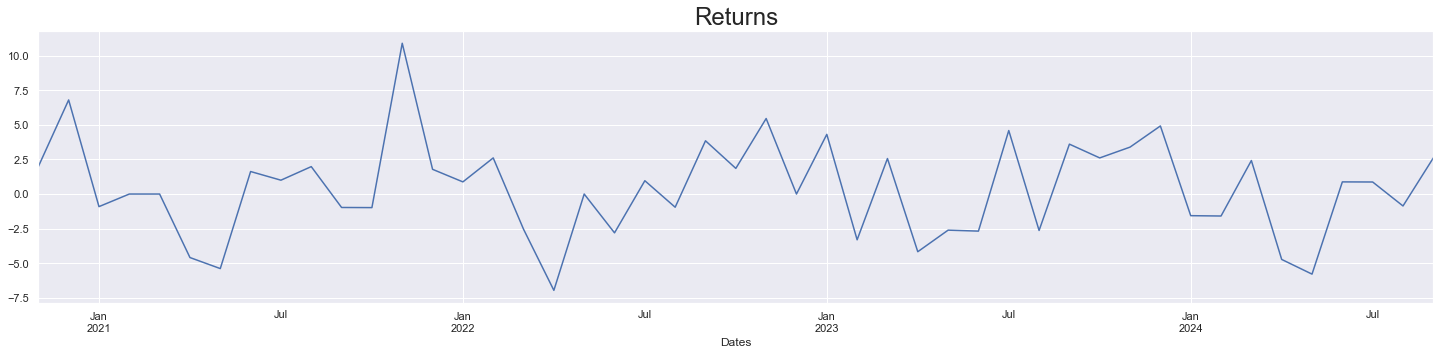

In [121]:
data_ret.returns.plot(figsize=(25,5))
plt.title("Returns",size=24)
plt.show()

<Figure size 432x288 with 0 Axes>

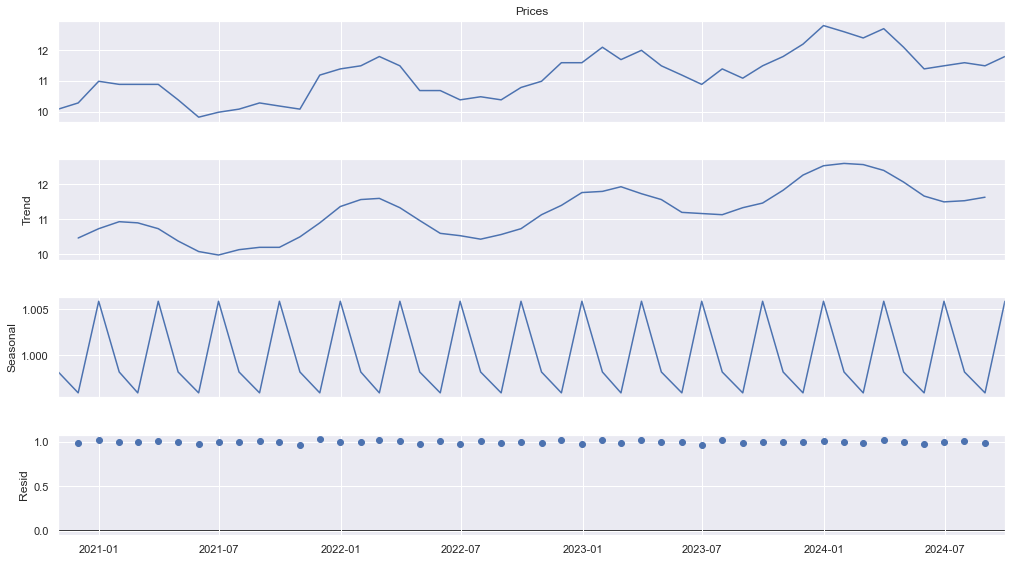

In [122]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data.Prices, model='multiplicative', period = 3)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Total: (47, 2)
Train: (38, 2)
Test: (9, 2)
Test start: 39
Test end: 47


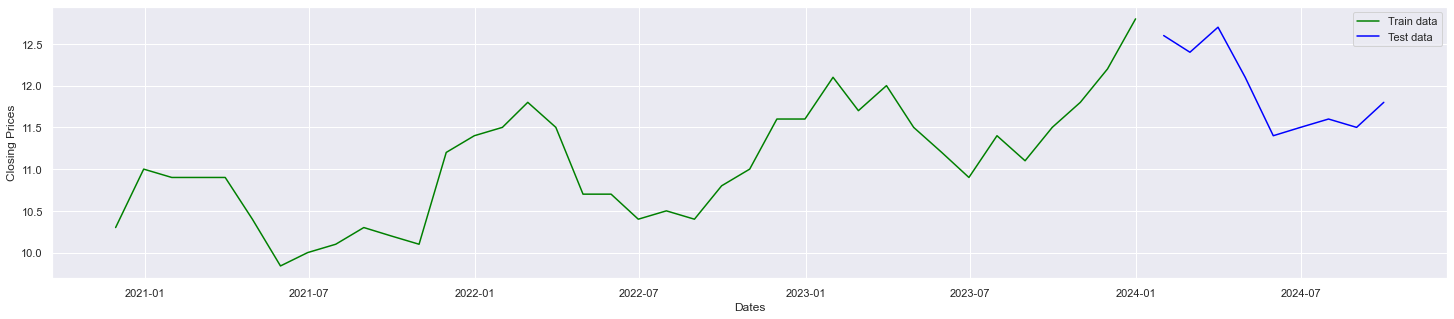

In [123]:
train_len = round(len(data_ret)*0.8)
test_len = round(len(data_ret)*0.2)

data_test = data_ret.iloc[train_len:]
data_train = data_ret.iloc[:train_len]

test_start = data_train.shape[0] + 1
test_end = data_ret.shape[0]

print(f"Total: {data_ret.shape}")
print(f"Train: {data_train.shape}")
print(f"Test: {data_test.shape}")
print(f"Test start: {test_start}")
print(f"Test end: {test_end}")

plt.figure(figsize=(25,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_train.Prices, 'green', label='Train data')
plt.plot(data_test.Prices, 'blue', label='Test data')
plt.legend()

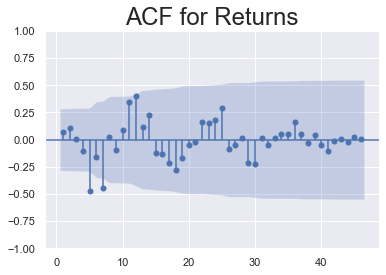

In [124]:
sgt.plot_acf(data_ret.returns, zero = False, lags = 46)
plt.title("ACF for Returns", size = 24)
plt.show()
# MA p = 5/7

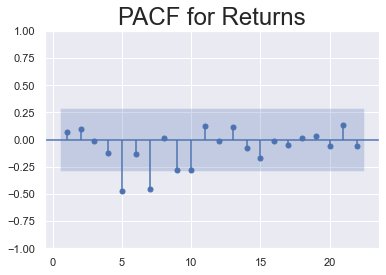

In [125]:
sgt.plot_pacf(data_ret.returns, zero = False, lags = 22)
plt.title("PACF for Returns", size = 24)
plt.show()
# AR 5/7

In [136]:
model_ARIMA = ARIMA(data_ret.returns, order = (7,0,0))
results_ARIMA = model_ARIMA.fit()
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   47
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -109.267
Date:                Mon, 09 Oct 2023   AIC                            236.534
Time:                        01:08:02   BIC                            253.185
Sample:                    11-30-2020   HQIC                           242.800
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4539      0.163      2.780      0.005       0.134       0.774
ar.L1         -0.2207      0.142     -1.551      0.121      -0.500       0.058
ar.L2         -0.1590      0.107     -1.484      0.1

In [141]:
import math
data_ret['ARIMA'] = results_ARIMA.resid
print(f"Mean: {data_ret.ARIMA.mean()}")
print(f"Variance: {data_ret.ARIMA.var()}")
print(f"Standard Deviation: {round(math.sqrt(data_ret.ARIMA.var()), 4)}")

Mean: -0.005801414612617876
Variance: 6.35110485397317
Standard Deviation: 2.5201


<Axes: xlabel='Dates'>

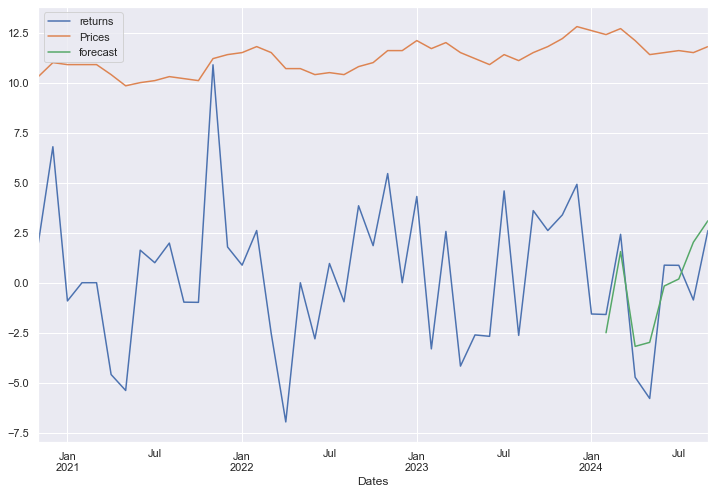

In [140]:
data_ret["forecast"] = results_ARIMA.predict(start=test_start,end=test_end,dynamic=True)
data_ret[['returns','Prices','forecast']].plot(figsize=(12,8))

In [180]:
model_SARIMAX=sm.tsa.statespace.SARIMAX(data_ret['Prices'],order=(7, 0, 0),seasonal_order=(7,0,0,12))
results=model_SARIMAX.fit()

<Axes: xlabel='Dates'>

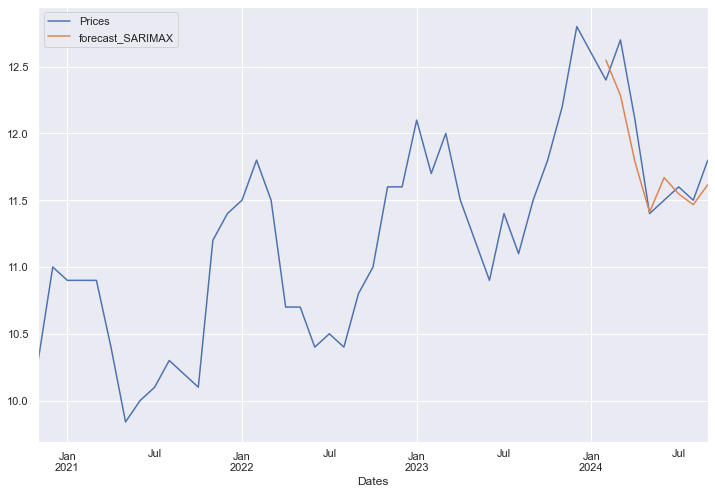

In [161]:

data_ret['forecast_SARIMAX']=results.predict(start=test_start,end=test_end,dynamic=True)
data_ret[['Prices','forecast_SARIMAX']].plot(figsize=(12,8))

In [181]:
def rolling_forecast(train, test, order, season):
    history = [x for x in train]
    model = SARIMAX(history, order= order, seasonal_order= season)
    model_fit = model.fit(disp=False)
    predictions = []
    results = {}
    yhat = model_fit.forecast()[0]

    predictions.append(yhat)
    history.append(test[0])
    for i in range(1, len(test)):
        model = SARIMAX(history, order= order, seasonal_order= season)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = math.sqrt(mse)
    predictions = pd.Series(predictions, index=test.index)
    results['predictions'] = predictions
    results['mse'] = mse
    results['rmse'] = rmse
    results['mae'] = mae
    return results

In [185]:
data_train

,Prices,returns
Dates,,
2020-11-30,10.3,1.980198
2020-12-31,11.0,6.796117
2021-01-31,10.9,-0.909091
2021-02-28,10.9,0.000000
2021-03-31,10.9,0.000000
...,...,...
2023-08-31,11.1,-2.631579
2023-09-30,11.5,3.603604
2023-10-31,11.8,2.608696


In [184]:
rolling_fcast = rolling_forecast(, , (7, 1, 0), (7, 0, 0, 12))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [163]:
# Define the starting date
start_date = pd.to_datetime('30-09-2024')  # Replace with your desired start date

# Create a date range for the next 12 months with the end of each month
end_of_month_dates = pd.date_range(start=start_date, periods=12, freq='M')

# # Print the end-of-month dates
# for date in end_of_month_dates:
#     print(date.strftime('%d-%m-%Y'))

df_new = pd.DataFrame({'EndOfMonthDates': end_of_month_dates})
df_new = df_new.set_index('EndOfMonthDates')
df_new


""
EndOfMonthDates
2024-09-30
2024-10-31
2024-11-30
2024-12-31
2025-01-31
...
2025-04-30
2025-05-31
2025-06-30


In [ ]:
data = pd.concat([data, df_new])
# List of columns to drop
columns_to_drop = ['returns', 'EndOfMonthDates']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

In [ ]:
data

In [ ]:






# Define the SARIMAX model
# Here, we specify the order and seasonal_order based on your data and analysis
# You should adjust these values to fit your specific time series
order = (5, 1, 7)            # Specify the non-seasonal order (p, d, q)
seasonal_order = (P, D, Q, s)  # Specify the seasonal order (P, D, Q, s)

# Create and fit the SARIMAX model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Generate forecasts for a specified number of time steps into the future
forecast_periods = 12  # Number of periods to forecast
forecast = results.get_forecast(steps=forecast_periods)

# Extract the forecasted values and associated confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the observed data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Value'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Value'], label='Test Data', color='green')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')

# Fill the confidence interval
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
def rolling_forecast(train, test, order, season):
    history = [x for x in train]
    model = SARIMAX(history, order= order, seasonal_order= season)
    model_fit = model.fit(disp=False)
    predictions = []
    results = {}
    yhat = model_fit.forecast()[0]

    predictions.append(yhat)
    history.append(test[0])
    for i in range(1, len(test)):
        model = SARIMAX(history, order= order, seasonal_order= season)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = math.sqrt(mse)
    predictions = pd.Series(predictions, index=test.index)
    results['predictions'] = predictions
    results['mse'] = mse
    results['rmse'] = rmse
    results['mae'] = mae
    return results

In [ ]:
https://www.kaggle.com/code/nholloway/seasonality-and-sarimax

In [ ]:
rolling_fcast = rolling_forecast(data_train.price , data_test.price, (7, 0, 0), (7, 0, 0, 12))

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Candy Production Rolling Forecast', fontsize=30)
plt.plot(data_train.price, label='Train')
plt.plot(rolling_fcast['predictions'], label='Forecast')
plt.plot(data_test.price, label='Test')

print(f'Mean Squared Error: {rolling_fcast["mse"]}')
print(f'Root Mean Squared Error: {rolling_fcast["rmse"]}')
print(f'Mean Absolute Error: {rolling_fcast["mae"]}')
plt.legend(fontsize=25)
plt.show()